## Assignment on K-Means Clustering with user defined functions

- Name: Jahnavi Murali
- Reg No.: 3122 21 5001 038

### Objective

Develop a python program to cluster the human activity using user defined K-means clustering
algorithm. Visualize the features from the dataset and interpret the results obtained by the
model using Matplotlib library

### Imports

In [1]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score


### Loading Data

In [2]:
Data = pd.read_csv('C:/Users/JAHNAVI/Desktop/ML-Lab/A6/archive/train.csv') 

In [3]:
Data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [4]:
Data.sample(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
1798,0.272557,-0.015493,-0.104264,-0.996320,-0.995981,-0.994231,-0.996926,-0.995165,-0.995284,-0.939482,...,-0.957402,0.048328,-0.302261,-0.336638,-0.149264,-0.483344,-0.077967,-0.300703,8,SITTING
2588,0.277925,-0.018677,-0.114218,-0.991162,-0.971764,-0.970756,-0.992975,-0.976629,-0.971473,-0.928826,...,-0.589951,0.027413,-0.111725,-0.265819,0.195098,-0.931165,0.063765,-0.021003,15,SITTING
1476,0.289615,-0.045023,-0.208656,-0.924663,-0.650303,-0.749753,-0.941464,-0.656761,-0.773986,-0.869310,...,-0.704112,-0.008714,0.016224,-0.178641,0.333120,-0.811181,0.201343,-0.065265,7,STANDING
2264,0.275527,-0.013269,-0.119917,-0.989635,-0.951600,-0.960183,-0.991191,-0.949449,-0.964220,-0.933929,...,-0.603643,0.002691,0.252106,0.562008,-0.390594,-0.848499,0.132405,0.122006,14,SITTING
7320,0.444521,-0.031033,-0.041120,0.073705,0.108595,-0.060661,0.038183,-0.039664,-0.075081,0.527402,...,-0.476347,-0.692695,-0.711148,-0.877483,-0.669912,-0.881920,0.139785,-0.056221,30,WALKING_DOWNSTAIRS


In [5]:
print('Shape of the data set: ' + str(Data.shape))

Shape of the data set: (7352, 563)


### Preprocessing

In [6]:
#save labels as string
Labels = Data['Activity']
Data = Data.drop(['subject', 'Activity'], axis = 1)
Labels_keys = Labels.unique().tolist()
Labels = np.array(Labels)
print('Activity labels: ' + str(Labels_keys))

Activity labels: ['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']


In [7]:
# Check for null values
Temp = pd.DataFrame(Data.isnull().sum())
Temp.columns = ['Sum']
print('Amount of rows with missing values: ' + str(len(Temp.index[Temp['Sum'] > 0])) )

Amount of rows with missing values: 0


In [8]:
#standardize the dataset
scaler = StandardScaler()
Data = scaler.fit_transform(Data)

In [9]:
# normalize the data set
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(Data)


### PCA for Dimensionality Reduction

In [10]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_pca = pca.fit_transform(normalized_data)


### Train Test Validation Set Split

In [17]:


X_train, X_rem, y_train, y_rem = train_test_split(X_pca, Labels, test_size=0.2, random_state=42)


X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.25, random_state=42) 

# Print the sizes of each set
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 5881
Validation set size: 1103
Testing set size: 368


### K Means Algorithm

In [20]:
class KMeans:
    def __init__(self, n_clusters, max_iters=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol

    def fit(self, X):
        # Initialize centroids randomly
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

        for _ in range(self.max_iters):
            # Assign each data point to the nearest centroid
            labels = self._assign_labels(X)

            # Update centroids
            new_centroids = self._update_centroids(X, labels)

            # Check convergence
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break

            self.centroids = new_centroids

        self.labels_ = self._assign_labels(X)
        return self

    def _assign_labels(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

    def _update_centroids(self, X, labels):
        new_centroids = np.empty_like(self.centroids)
        for i in range(self.n_clusters):
            new_centroids[i] = X[labels == i].mean(axis=0)
        return new_centroids




In [21]:
# Initialize and fit KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train)

# Get cluster labels for training set
train_cluster_labels = kmeans.labels_

# Get cluster labels for validation set (optional)
val_cluster_labels = kmeans._assign_labels(X_val)

# Get cluster labels for testing set (optional)
test_cluster_labels = kmeans._assign_labels(X_test)

# Set inertia
inertia = 0 

# Get silhouette score (optional)
silhouette = 0

# Get inertia
inertia = np.sum(np.min(np.sqrt(((X_train - kmeans.centroids[:, np.newaxis])**2).sum(axis=2)), axis=0))

# Get silhouette score
silhouette = silhouette_score(X_train, train_cluster_labels)

print("Inertia:", inertia)
print("Silhouette Score:", silhouette)

Inertia: 4437.943713767316
Silhouette Score: 0.5934533581892202


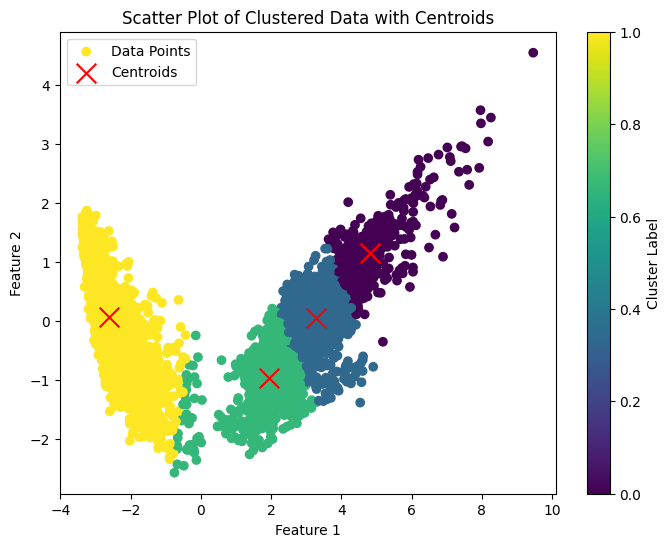

In [23]:
import matplotlib.pyplot as plt

# Scatter plot of clustered data with centroids
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=train_cluster_labels, cmap='viridis', label='Data Points')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='x', s=200, c='red', label='Centroids')
plt.title('Scatter Plot of Clustered Data with Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()


### Inferences

We can also infer that both user defined and built in sklearn kmeans in Assignment 6 gives almost same
inertia and silhouette score values

### Learning Outcomes

- Understood and implemented the concept of KMeans Clustering Algorithm
- Understood and implemented user defined custom designed models for kmeans and
compared the results with the built in functions.
- Understood and implemented displaying results of training and testing in the form of
graphs